In [1]:
# Facilita la lectura del codigo
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
#Parameters

%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)

plt.rcParams["figure.figsize"] = (60, 30)

columns = ['operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses']

# NORTE 21º 46' 52" S; 66º 13' 17" O   
lim_norte = (-21.7811111, -66.2213888888889)
# SUR 55º 03' 21" S; 66º 31' 25" O
lim_sur = (-55.0558333, -66.52361111111111)
# ESTE 26º 14' 59" S; 53º 38' 15" O
lim_este = (-26.2497222, -53.6375)
# OESTE 50º 01’ S; 73º 34' O
lim_oeste = (-50.0166667, -73.56666666666666)

In [4]:
df = pd.read_csv("properatti.csv", usecols=columns)

In [5]:
df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN


# Analisis

*   Se comprueban nulos

In [6]:
df.value_counts()
df.isna().sum().sort_values()

operation                          0
property_type                      0
place_with_parent_names            0
country_name                       0
state_name                         0
place_name                        23
geonames_id                    18717
surface_covered_in_m2          19907
price_aprox_usd                20410
price_aprox_local_currency     20410
price                          20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lon                            51550
lat                            51550
lat-lon                        51550
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
dtype: int64

In [22]:
df.property_type.value_counts()

apartment    33723
house        12732
PH            3058
store         1379
Name: property_type, dtype: int64

In [7]:
df.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [8]:
df.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
dtype: object

In [9]:
df[df.index == 9761]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
9761,sell,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,"4.5458426,-75.67893099",4.545843,-75.678931,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN


In [ ]:
df = df[(df.price > 0) & (df.price < 600000)]
df = df[(df.surface_total_in_m2 <= 400) & (df.surface_total_in_m2 > 0)]
df = df[df.currency == "USD"]

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

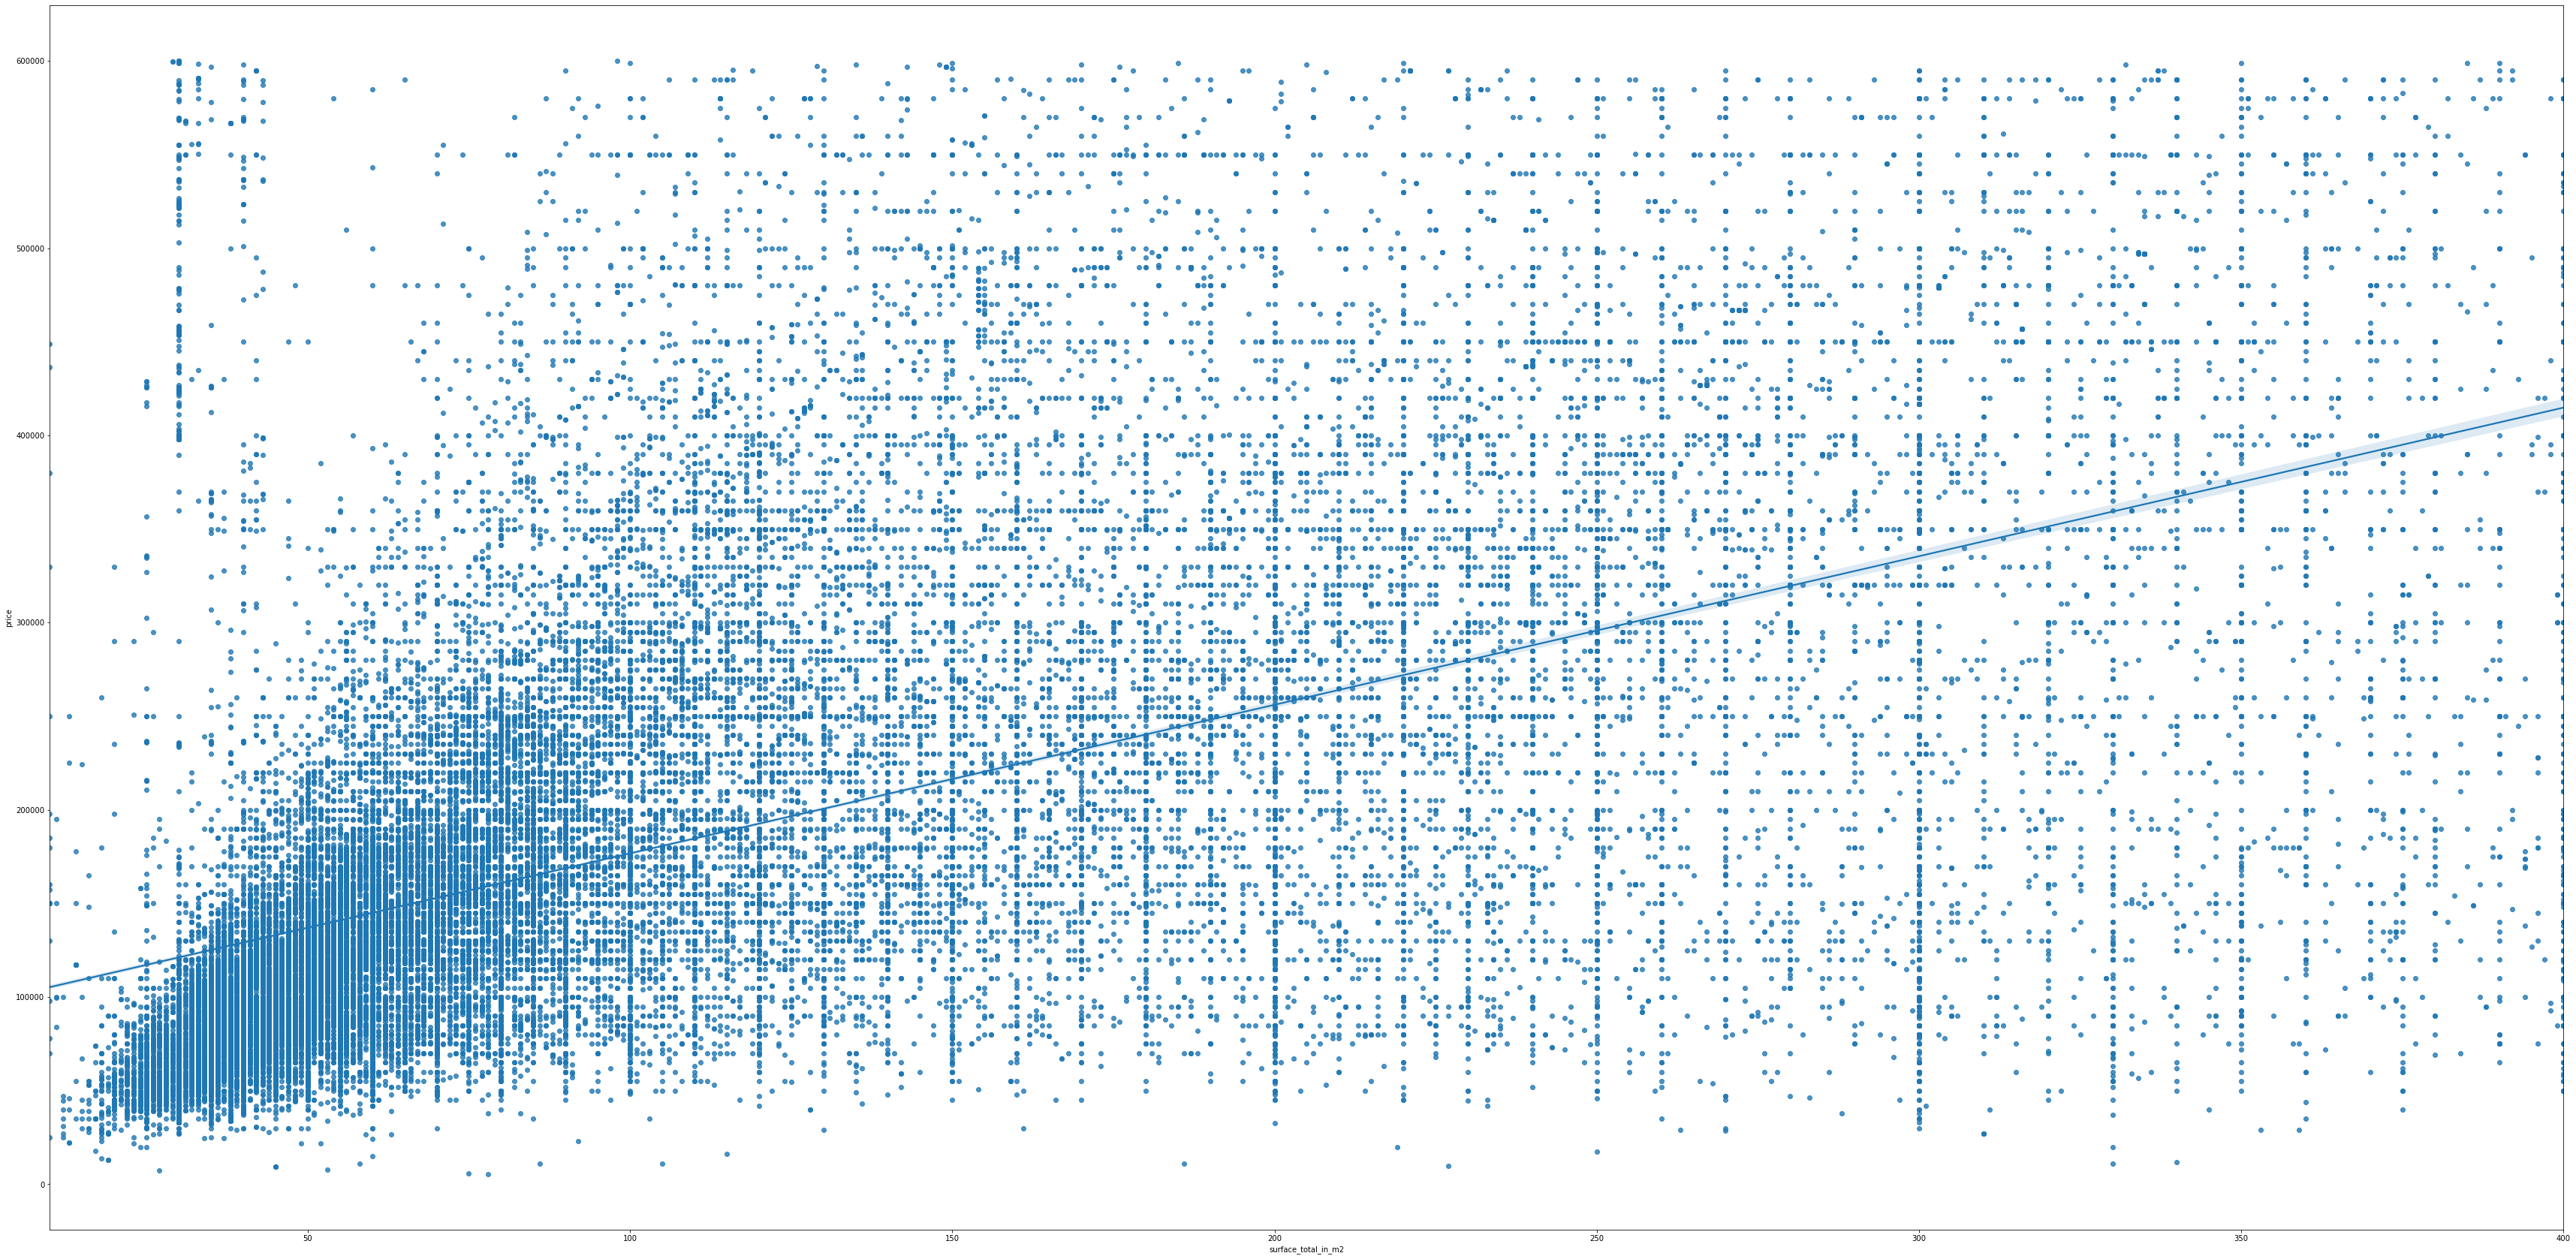

In [16]:
x = df.surface_total_in_m2
y = df.price
sns.regplot(x=x, y=y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

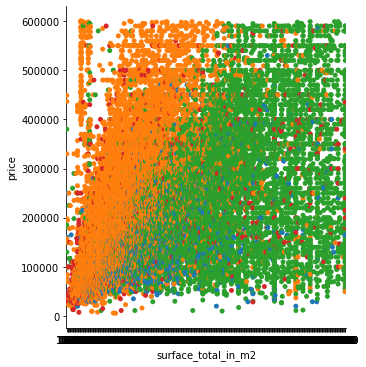

In [23]:
# sns.catplot( x=x, y=y, data=df, hue='property_type')

#  Limpieza

*   ~~Se elimina columna "Unnamed: 0" por indice duplicado.~~
*   ~~Se elimina "description", "tittle" sin uso actual.~~
*   Se elimina filas que contengas lon y lat nulos

In [ ]:
#df_clean = df.drop(columns=["Unnamed: 0", "description", "tittle"]) 

# Los valores NA en Longitud y Latitud causan error.
df.dropna(axis=0,subset=["lon","lat"],inplace=True)

# Geopandas

    

In [ ]:
gdf = gpd.read_file("limites\json\departamento.json")
gdf = gdf[gdf.nam != "Antártida Argentina"]
gdf = gdf[gdf.nam != "Islas del Atlántico Sur"]
gdf.to_crs(epsg=4326).plot()

In [ ]:
crs = {'init':'EPSG:4326'}
df = df[df.index != 9761] # Coordenadas fuera de Argentina
geometry = [Point(xy) for xy in zip( df.lon, df.lat)]
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

In [ ]:
fig, ax = plt.subplots()
gdf.to_crs(epsg=4326).plot(ax=ax, color="lightgrey")
geo_df.plot(ax=ax, alpha = .1)

In [ ]:
geo_df['price_log'] = np.log(geo_df['price'])

fig, ax = plt.subplots()
gdf.to_crs(epsg=4326).plot(ax=ax, color="lightgrey")
geo_df.plot(column = 'price_log', ax=ax, cmap = 'rainbow', markersize = 20)